In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import sys; sys.path.append('..')
import random, math, os
import pyzx as zx
from fractions import Fraction
import numpy as np
%config InlineBackend.figure_format = 'svg'
zx.quantomatic.quantomatic_location = r'C:\Users\John\Desktop\Quantomatic.jar'
zx.tikz.tikzit_location = r'C:\Users\John\Documents\tikzit\tikzit.exe'

In [38]:
circ_name = r'../circuits/Fast/hwb6.qc'
#circ_name = "../circuits/PF/pf4_10_after"
#circ_name = r'../circuits/broken/cycle_17_3.qc'
c_orig = zx.Circuit.load(circ_name)
#c_orig = zx.Circuit.load(circ_name)
print(c_orig.to_basic_gates().stats())
#display(zx.draw(c_orig,figsize=(10,3),h_edge_draw='box'))
g = c_orig.to_graph()
zx.simplify.full_reduce(g,quiet=False)
g.normalise()
print(zx.tcount(g))
print("vertex count", len(list(g.vertices())))
#zx.draw(g,labels=True)

Circuit  on 7 qubits with 259 gates.
        105 is the T-count
        154 Cliffords among which 
        116 2-qubit gates and 30 Hadamard gates.
spider_simp: 47. 35. 22. 14. 5. 3. 1.  7 iterations
id_simp: 17. 2.  2 iterations
spider_simp: 7. 1.  2 iterations
pivot_simp: 15. 3. 3.  3 iterations
lcomp_simp: 3. 3.  2 iterations
id_simp: 2.  1 iterations
spider_simp: 1.  1 iterations
pivot_simp: 1.  1 iterations
id_simp: 2.  1 iterations
spider_simp: 1. 1.  2 iterations
lcomp_simp: 1. 1.  2 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
pivot_gadget_simp: 32. 11. 7. 4. 4. 3. 2. 1.  8 iterations
id_simp: 5.  1 iterations
spider_simp: 3. 2.  2 iterations
pivot_simp: 1.  1 iterations
lcomp_simp: 2. 2.  2 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
pivot_simp: 1.  1 iterations
gadget_simp: 3.  1 iterations
lcomp_simp: 3. 3.  2 iterations
75
vertex count 148


In [39]:
g = c_orig.to_graph()
#zx.full_reduce(g)
g.apply_state("++---+-")
g.apply_effect("+011-1-")
#g.scalar.add_power(-24)
print(g.to_matrix())
zx.simplify.full_reduce(g,quiet=False)
zx.tcount(g)
#zx.draw(g)

[[-0.0625+0.j]]
spider_simp: 52. 38. 24. 14. 5. 3. 1.  7 iterations
id_simp: 19. 3. 1.  3 iterations
spider_simp: 9. 1.  2 iterations
pivot_simp: 14. 3. 3.  3 iterations
lcomp_simp: 3. 3.  2 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
pivot_simp: 1.  1 iterations
pivot_gadget_simp: 31. 14. 14. 7. 2. 3. 1.  7 iterations
id_simp: 8.  1 iterations
spider_simp: 3. 2. 2. 1.  4 iterations
pivot_simp: 1.  1 iterations
lcomp_simp: 2. 2.  2 iterations
pivot_simp: 2.  1 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
lcomp_simp: 1. 1.  2 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
lcomp_simp: 1. 1.  2 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
pivot_simp: 1.  1 iterations
gadget_simp: 15.  1 iterations
id_simp: 6.  1 iterations
spider_simp: 3. 2. 1.  3 iterations
pivot_simp: 2. 1.  2 iterations
lcomp_simp: 9. 5.  2 iterations
pivot_simp: 1.  1 iterations
pivot_gadget_simp: 2.  1 iterations
gadget_simp: 1.  1

33

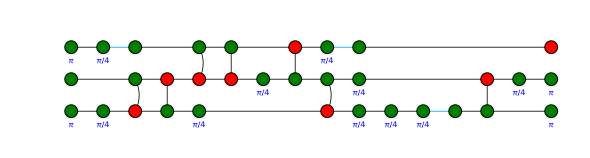

(-0.1401650429449556+0.08838834764831874j)
(-0.14016504294495521+0.08838834764831842j)


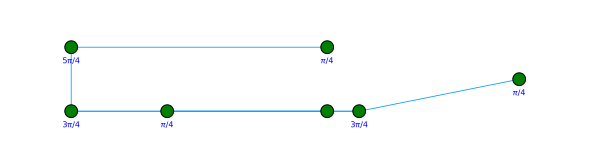

None

(-0.14016504294495521+0.08838834764831842j)


In [23]:
random.seed(474340)
qubits = 3
depth = 20
c = zx.generate.CNOT_HAD_PHASE_circuit(qubits,depth,p_had=0.1, p_t=0.3)
g = c.to_graph()
g.apply_state(''.join(random.choice('+-01') for _ in range(qubits)))
g.apply_effect(''.join(random.choice('+-01') for _ in range(qubits)))
display(zx.draw(g))
t = g.to_tensor()
print(t)
g2 = g.copy()
zx.simplify.clifford_simp(g2,quiet=True)
print(g2.to_tensor())
display(zx.draw(g2))
#g2 = g.copy()
zx.simplify.full_reduce(g2,quiet=False)
display(zx.d3.draw(g2))
print(g2.to_tensor())

In [32]:
g2.connected(2,29)

False

In [49]:
print(zx.tcount(g))
%timeit zx.simulate.calculate_path_sum(g)
#zx.spider_simp(g3,quiet=True)
#zx.d3.draw(g3)

33
56.1 ms ± 1.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
gsum = zx.simulate.replace_magic_states(g)

In [43]:
gsum.full_reduce()

In [44]:
gsum.graphs

[Graph(41 vertices, 117 edges),
 Graph(41 vertices, 117 edges),
 Graph(42 vertices, 114 edges),
 Graph(42 vertices, 114 edges),
 Graph(0 vertices, 0 edges),
 Graph(42 vertices, 106 edges),
 Graph(42 vertices, 104 edges)]

In [45]:
sum(zx.simulate.calculate_path_sum(h) for h in gsum.graphs)

(-0.06250000000000283+3.410184655203726e-16j)

In [207]:
g = zx.Graph()
v = g.add_vertex(1,0,0,phase=Fraction(1))
#w = g.add_vertex(1,1,0)
#g.add_edge((v,w))
g2 = g.copy()
g2.remove_isolated_vertices()

In [208]:
zx.compare_tensors(g,g2)

True

In [209]:
g.to_tensor()

array(0.+0.j)

In [201]:
itertools.product()

()

In [203]:
np.tensor.Z_to_tensor(0,0)

AttributeError: module 'numpy' has no attribute 'tensor'

In [195]:
g.to_tensor()

array(2.+0.j)

In [172]:
2**7 

128

In [161]:
zx.tcount(g2)

33

In [163]:
[0]*9

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [165]:
type(np.dot([1,2,3],[1,1,1]))

numpy.int32

In [79]:
g2.inputs, g2.outputs

([], [])

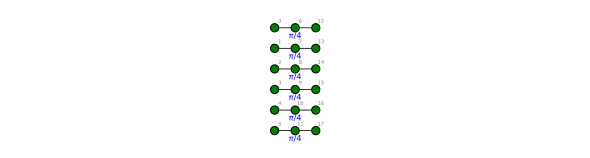

spider_simp: 6.  1 iterations


In [73]:
test = zx.Circuit(6)
for i in range(6):
    test.add_gate("T",i)
g = test.to_graph()
g.apply_state("++++++")
g.apply_effect("++++++")
m = g.to_matrix()
display(zx.draw(g,labels=True))
zx.simplify.spider_simp(g,quiet=False)
g.scalar.add_power(0)
m2 = g.to_matrix()

In [44]:
g.to_matrix()

matrix([[-0.43972087+0.43972087j]])

In [40]:
g.scalar

Scalar(8.00+0.00j = sqrt(2)^6)

In [8]:
gsum = zx.simulate.replace_magic_states(g)

In [9]:
np.allclose(g.to_matrix(),gsum.to_matrix())

True

In [25]:
a = set([1,5,8])
x = np.array([(k in a) for k in range(9)])
b = set([1,3,8])
y = np.array([(k in b) for k in range(9)])
np.dot(x,y)

True

In [28]:
import itertools
list(itertools.product([1,2],repeat=3))

[(1, 1, 1),
 (1, 1, 2),
 (1, 2, 1),
 (1, 2, 2),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 1),
 (2, 2, 2)]

In [32]:
np.dot((0,1,0,0,1,0,0,0,1),(0,1,0,0,1,0,0,0,1))

3

In [34]:
float(1j)

TypeError: can't convert complex to float

In [60]:
gsum.full_reduce(False)

Graph 0:
id_simp: 4.  1 iterations
pivot_simp: 1. 2. 1. 1.  4 iterations
id_simp: 1.  1 iterations
Graph 1:
id_simp: 4.  1 iterations
pivot_simp: 1. 2. 1. 1.  4 iterations
id_simp: 1.  1 iterations
Graph 2:
id_simp: 4.  1 iterations
lcomp_simp: 2. 2.  2 iterations
pivot_simp: 1.  1 iterations
pivot_gadget_simp: 1.  1 iterations
gadget_simp: 3.  1 iterations
pivot_simp: 2.  1 iterations
lcomp_simp: 1. 1.  2 iterations
id_simp: 1.  1 iterations
Graph 3:
id_simp: 4.  1 iterations
lcomp_simp: 2. 2.  2 iterations
pivot_simp: 1.  1 iterations
pivot_gadget_simp: 1.  1 iterations
gadget_simp: 3.  1 iterations
pivot_simp: 1.  1 iterations
lcomp_simp: 2. 2.  2 iterations
Graph 4:
spider_simp: 1. 1. 1. 1. 1. 1.  6 iterations
id_simp: 4.  1 iterations
gadget_simp: 3.  1 iterations
lcomp_simp: 3. 3.  2 iterations
Graph 5:
spider_simp: 1.  1 iterations
id_simp: 4.  1 iterations
pivot_simp: 2. 1. 1. 1. 2.  5 iterations
pivot_gadget_simp: 1.  1 iterations
gadget_simp: 3.  1 iterations
id_simp: 1.  1 i

In [62]:
gsum.graphs

[Graph(30 vertices, 39 edges),
 Graph(30 vertices, 39 edges),
 Graph(20 vertices, 26 edges),
 Graph(21 vertices, 26 edges),
 Graph(14 vertices, 15 edges),
 Graph(21 vertices, 27 edges),
 Graph(21 vertices, 27 edges)]

In [63]:
[zx.tcount(h) for h in gsum.graphs]

[9, 9, 3, 3, 0, 3, 3]

In [66]:
zx.compare_tensors(c_orig.to_tensor(True),gsum.to_tensor(),True)

True

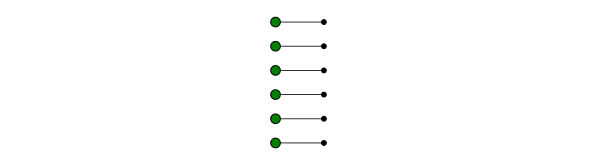

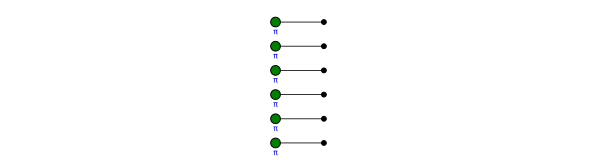

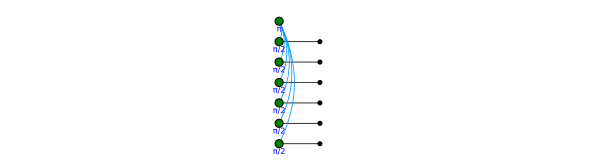

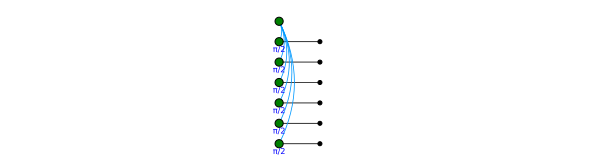

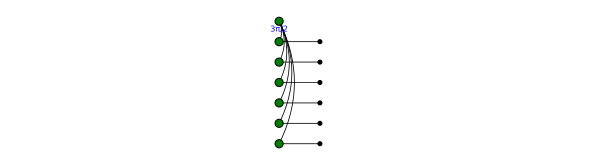

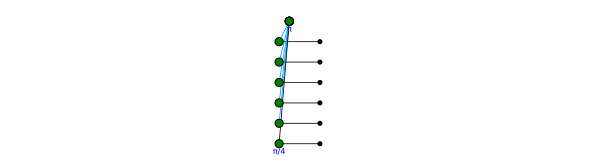

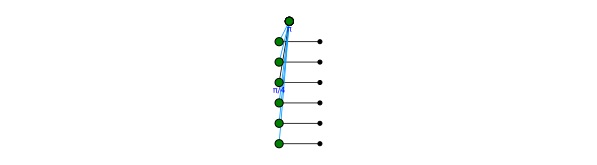

In [52]:
for h in gsum.graphs:
    display(zx.draw(h))

In [24]:
gsum.full_reduce(False)

Graph 0:
id_simp: 4.  1 iterations
pivot_simp: 1. 2. 1. 1.  4 iterations
id_simp: 1.  1 iterations
Graph 1:
id_simp: 4.  1 iterations
pivot_simp: 1. 2. 1. 1.  4 iterations
id_simp: 1.  1 iterations
Graph 2:
id_simp: 4.  1 iterations
lcomp_simp: 2. 2.  2 iterations
pivot_simp: 1.  1 iterations
pivot_gadget_simp: 1.  1 iterations
gadget_simp: 3.  1 iterations
pivot_simp: 2.  1 iterations
lcomp_simp: 1. 1.  2 iterations
id_simp: 1.  1 iterations
Graph 3:
id_simp: 4.  1 iterations
lcomp_simp: 2. 2.  2 iterations
pivot_simp: 1.  1 iterations
pivot_gadget_simp: 1.  1 iterations
gadget_simp: 3.  1 iterations
pivot_simp: 1.  1 iterations
lcomp_simp: 2. 2.  2 iterations
Graph 4:
spider_simp: 1. 1. 1. 1. 1. 1.  6 iterations
id_simp: 4.  1 iterations
gadget_simp: 3.  1 iterations
lcomp_simp: 3. 3.  2 iterations
Graph 5:
spider_simp: 1.  1 iterations
id_simp: 4.  1 iterations
pivot_simp: 2. 1. 1. 1. 1.  5 iterations
pivot_gadget_simp: 1. 1.  2 iterations
gadget_simp: 3.  1 iterations
id_simp: 1.  

In [25]:
gsum.graphs

[Graph(30 vertices, 39 edges),
 Graph(30 vertices, 39 edges),
 Graph(20 vertices, 26 edges),
 Graph(21 vertices, 26 edges),
 Graph(14 vertices, 15 edges),
 Graph(23 vertices, 30 edges),
 Graph(21 vertices, 27 edges)]

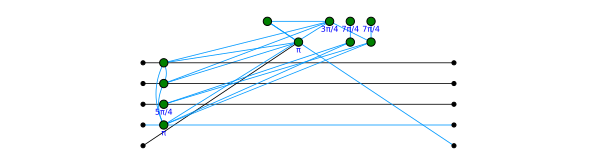

In [26]:
zx.draw(gsum.graphs[6])

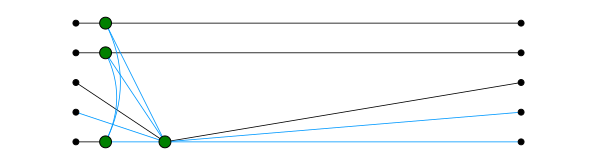

In [29]:
zx.draw(gsum.graphs[4])

In [30]:
gsum.to_tensor()

array([[[[[[[[[[ 1.0000000-0.j       , -0.1767767-0.0732233j],
               [ 0.0000000-0.j       , -0.0000000-0.j       ]],

              [[ 0.0000000+0.j       ,  0.0000000+0.j       ],
               [ 0.0000000+0.j       ,  0.0000000+0.j       ]]],


             [[[ 0.0000000+0.j       ,  0.0000000+0.j       ],
               [ 0.0000000+0.j       ,  0.0000000+0.j       ]],

              [[ 0.0000000+0.j       ,  0.0000000+0.j       ],
               [ 0.0000000+0.j       ,  0.0000000+0.j       ]]]],



            [[[[ 0.0000000+0.j       ,  0.0000000+0.j       ],
               [ 0.0000000+0.j       ,  0.0000000+0.j       ]],

              [[ 0.0000000+0.j       ,  0.0000000+0.j       ],
               [ 0.0000000+0.j       ,  0.0000000+0.j       ]]],


             [[[ 0.0000000+0.j       ,  0.0000000+0.j       ],
               [ 0.0000000+0.j       ,  0.0000000+0.j       ]],

              [[ 0.0000000+0.j       ,  0.0000000+0.j       ],
               [ 0.0000000+0.j   

In [19]:
c_orig.to_matrix(True)

matrix([[ 1.-0.j, -0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
        [-0.+0.j,  1.-0.j, -0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j, -0.-0.j,  1.-0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
        ..., 
        [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  1.-0.j,  0.-0.j, -0.-0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, ..., -0.-0.j, -0.-0.j,  0.-0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, ..., -0.-0.j, -0.-0.j,  1.-0.j]])

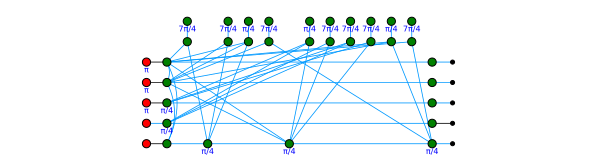

In [20]:
g.apply_state('11100')
zx.draw(g)

id_simp: 4.  1 iterations
spider_simp: 1.  1 iterations
pivot_simp: 1. 1. 1.  3 iterations
pivot_gadget_simp: 1. 1.  2 iterations
id_simp: 2.  1 iterations
spider_simp: 2.  1 iterations
lcomp_simp: 1. 1.  2 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
pivot_boundary_simp: 1.  1 iterations
gadget_simp: 4.  1 iterations
id_simp: 3.  1 iterations
spider_simp: 2. 1.  2 iterations
lcomp_simp: 2. 1. 1.  3 iterations


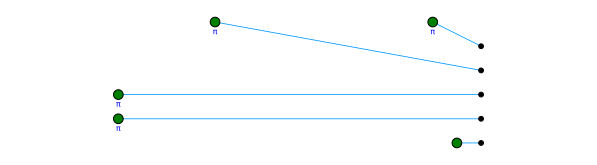

In [21]:
zx.full_reduce(g,quiet=False)
zx.draw(g)

In [22]:
print(g.scalar)

0.18+0.00j = sqrt(2)^-5


In [17]:
print(g.to_matrix(True))

[[ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 1.-0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]]


In [17]:
a = [1,2,3]
b = a.copy()
a.pop()
b

[1, 2, 3]

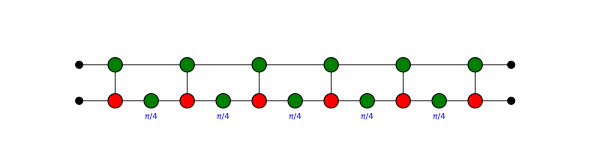

[[ 1.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.70710678-0.70710678j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.70710678+0.70710678j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.        +1.j        ]]


In [105]:
random.seed(1345)
#g = zx.generate.cliffordT(3,100,p_t=0.2,p_cnot=0.3)
c = zx.Circuit(2)
c.add_gate("ParityPhase",Fraction(1,4),0,1)
c.add_gate("T",1)
c.add_gate("ParityPhase",Fraction(1,4),0,1)
c.add_gate("T",1)
c.add_gate("ParityPhase",Fraction(1,4),0,1)
g = c.to_graph()
display(zx.draw(g))
print(g.to_matrix(True))

In [102]:
g.scalar

Scalar(8.00+0.00j = sqrt(2)^6)

In [106]:
g2 = g.copy()
# zx.simplify.spider_simp(g2)
# zx.simplify.to_gh(g2)
# zx.simplify.id_simp(g2)
# zx.simplify.spider_simp(g2)
# zx.simplify.pivot_simp(g2)
# zx.simplify.lcomp_simp(g2)
#zx.simplify.clifford_simp(g2,quiet=False)
zx.simplify.full_reduce(g2,quiet=False)
#g2.normalise()
print(zx.compare_tensors(g,g2,True))
print(g2.to_matrix(True))

spider_simp: 2. 1. 1. 1.  4 iterations
pivot_gadget_simp: 3. 1.  2 iterations
id_simp: 3.  1 iterations
spider_simp: 1.  1 iterations
gadget_simp: 1.  1 iterations
True
[[ 1.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.70710678-0.70710678j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.70710678+0.70710678j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.        +1.j        ]]


In [104]:
g2.scalar

Scalar(1.41+0.00j = sqrt(2)^1)

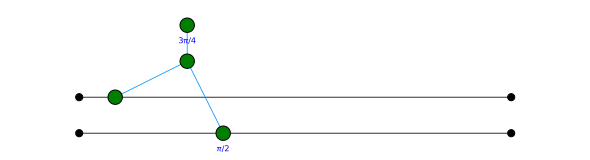

In [100]:
zx.draw(g)

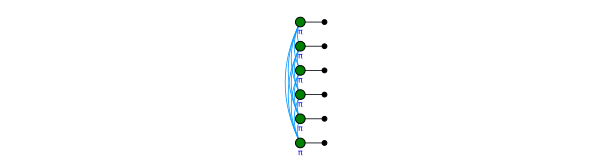

In [15]:
#Z^6 |K_6>
g = zx.Graph()
verts = []
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    v = g.add_vertex(1,i, 0,Fraction(1))
    verts.append(v)
    g.add_edge((o,v))
g.scalar.add_power(15)
for i in range(6):
    for j in range(i+1,6):
        g.add_edge((verts[i],verts[j]),2)
display(zx.draw(g))
K6 = g.to_matrix(True)

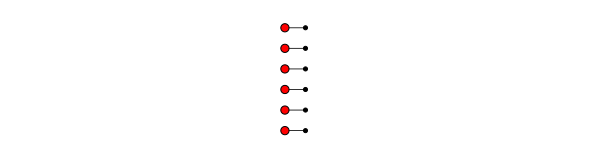

In [128]:
# |0>^6
g = zx.Graph()
verts = []
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    v = g.add_vertex(2,i, 0)
    verts.append(v)
    g.add_edge((o,v))
g.scalar.add_power(-6)
display(zx.draw(g))
ket0 = g.to_matrix(True)

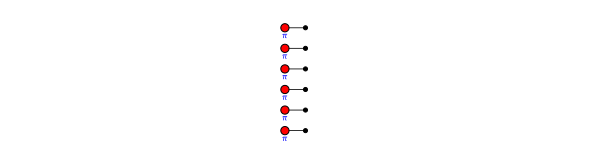

In [133]:
# |1>^6
g = zx.Graph()
verts = []
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    v = g.add_vertex(2,i, 0, phase=Fraction(1))
    verts.append(v)
    g.add_edge((o,v))
g.scalar.add_power(-6)
display(zx.draw(g))
ket1 = g.to_matrix(True)

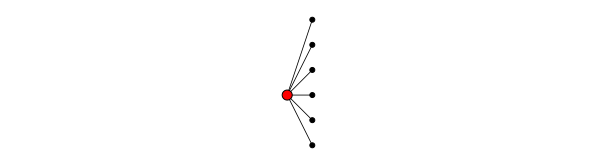

In [14]:
# |E_6>
g = zx.Graph()
v = g.add_vertex(2,3, 0)
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    g.add_edge((o,v))
g.scalar.add_power(4)
display(zx.draw(g))
E6 = g.to_matrix(True)

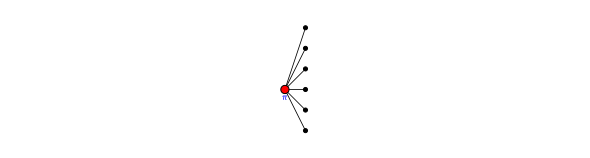

In [140]:
# |O_6>
g = zx.Graph()
v = g.add_vertex(2,3, 0, Fraction(1))
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    g.add_edge((o,v))
g.scalar.add_power(4)
display(zx.draw(g))
O6 = g.to_matrix(True)

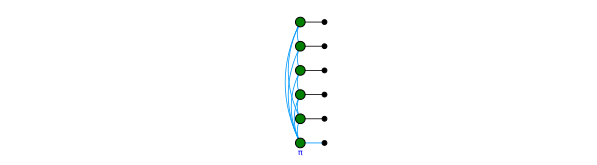

In [16]:
# |phi'>
g = zx.Graph()
verts = []
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    v = g.add_vertex(1,i, 0)
    verts.append(v)
    if i == 5:
        g.add_edge((o,v),2)
    else: g.add_edge((o,v))
g.scalar.add_power(9)
for i in range(4):
    g.add_edge((verts[i],verts[i+1]),2)
    g.add_edge((verts[i],verts[5]),2)
g.add_edge((verts[0],verts[4]),2)
g.add_edge((verts[4],verts[5]),2)
g.set_phase(verts[5],Fraction(1))
display(zx.draw(g))
phi1 = g.to_matrix(True)

In [18]:
a = [1,2,3,4]
a[:3]

[1, 2, 3]

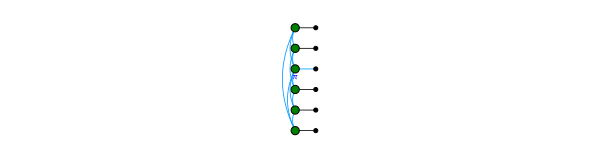

In [158]:
# |phi''>
g = zx.Graph()
verts = []
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    v = g.add_vertex(1,i, 0)
    verts.append(v)
    if i == 2:
        g.add_edge((o,v),2)
    else: g.add_edge((o,v))
g.scalar.add_power(9)
v1,v2,v3,v4,v5,v6 = verts
g.add_edges([(v1,v2),(v2,v4),(v4,v5),(v5,v6),(v1,v6),(v1,v3),(v2,v3),(v3,v4),(v3,v5),(v3,v6)],2)
g.set_phase(v3,Fraction(1))
display(zx.draw(g))
phi2 = g.to_matrix(True)

In [20]:
sq2 = math.sqrt(2)
H6 = (-16+12*sq2)*ket0 + (96 - 68*sq2)*ket1 + \
     (10-7*sq2)*E6 + (-14 + 10*sq2)*O6 + \
     (7-5*sq2)*K6 + (10-7*sq2)*phi1 + \
     (10-7*sq2)*phi2
H6

NameError: name 'ket0' is not defined

In [ ]:
g.add_vertex()

In [24]:
H = np.matrix([[1],[sq2 - 1]])
T = 1/(1-1j*math.tan(math.pi/8))*np.matrix([[1,1],[1,-1]])*np.matrix([[1,0],[0,-1j]])* H
T

matrix([[ 1.00000000-0.j        ],
        [ 0.70710678+0.70710678j]])

In [25]:
v = sq2/(1-1j*math.tan(math.pi/8))
v**6

(-3.51776695296637+3.517766952966372j)

In [27]:
- (7+5*sq2)/(2+2j)

(-3.517766952966369+3.517766952966369j)

In [168]:
ar = []
for b in range(2**6):
    ones = len([i for i in bin(b)[2:] if i=='1'])
    ar.append([(sq2-1)**ones])
H = np.matrix(ar)
H

matrix([[1.        ],
        [0.41421356],
        [0.41421356],
        [0.17157288],
        [0.41421356],
        [0.17157288],
        [0.17157288],
        [0.07106781],
        [0.41421356],
        [0.17157288],
        [0.17157288],
        [0.07106781],
        [0.17157288],
        [0.07106781],
        [0.07106781],
        [0.02943725],
        [0.41421356],
        [0.17157288],
        [0.17157288],
        [0.07106781],
        [0.17157288],
        [0.07106781],
        [0.07106781],
        [0.02943725],
        [0.17157288],
        [0.07106781],
        [0.07106781],
        [0.02943725],
        [0.07106781],
        [0.02943725],
        [0.02943725],
        [0.01219331],
        [0.41421356],
        [0.17157288],
        [0.17157288],
        [0.07106781],
        [0.17157288],
        [0.07106781],
        [0.07106781],
        [0.02943725],
        [0.17157288],
        [0.07106781],
        [0.07106781],
        [0.02943725],
        [0.07106781],
        [0

In [169]:
np.allclose(H6,H)

True

In [123]:
g.to_matrix()

matrix([[ 1.+0.j, -1.+0.j]])

In [117]:
2**(len(g.inputs))

1

In [68]:
a = -0.00069053-0.00028603j
b = 0.00028603-0.00069053j
a/b

(-0-1j)

In [81]:
zx.compare_tensors(g,g2,True)

True

spider_simp: 7. 6. 3. 2. 1. 1.  6 iterations
id_simp: 5.  1 iterations
pivot_simp: 1.  1 iterations


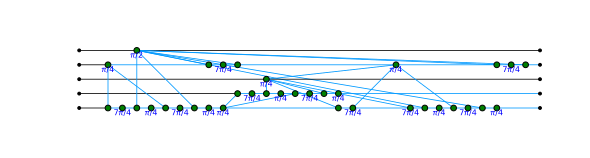

In [33]:
g = c_orig.to_graph()
zx.simplify.interior_clifford_simp(g,quiet=False)
zx.draw(g)

In [34]:
print(g.to_matrix(True))

[[ 1.-0.j  0.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.-0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -0.-0.j  1.-0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ...  1.-0.j  0.-0.j  0.-0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.-0.j -0.-0.j -0.-0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.-0.j  0.-0.j  1.-0.j]]


In [35]:
g.scalar

Scalar(724.08+0.00j = sqrt(2)^19)

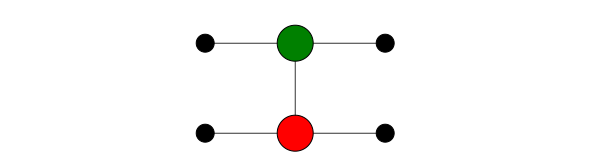

In [6]:
c = zx.Circuit(2)
c.add_gate("CNOT",0,1)
#c.add_gate("CNOT",1,0)
#c.add_gate("CNOT",0,1)
zx.draw(c)

In [7]:
g = c.to_graph()
g = zx.quantomatic.edit_graph(g)

Opening Quantomatic...
Done


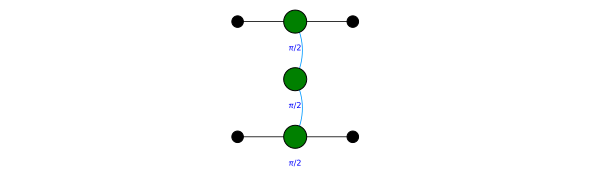

In [8]:
zx.draw(g)

In [14]:
m = g.to_matrix(preserve_scalar=True)
m

matrix([[ 0.5+0.5j,  0. +0.j ,  0. +0.j ,  0. +0.j ],
        [ 0. +0.j ,  0.5+0.5j,  0. +0.j ,  0. +0.j ],
        [ 0. +0.j ,  0. +0.j ,  0.5+0.5j,  0. +0.j ],
        [ 0. +0.j ,  0. +0.j ,  0. +0.j , -0.5-0.5j]])

lcomp_simp: 1.  1 iterations


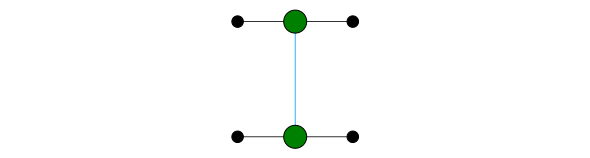

In [18]:
g2 = g.copy()
zx.simplify.clifford_simp(g2)
zx.draw(g2)

In [19]:
print(g2.to_matrix(True))

[[ 0.5+0.5j  0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j   0.5+0.5j  0. +0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j   0.5+0.5j  0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j  -0.5-0.5j]]


In [20]:
g2.scalar

Scalar(0.71+0.71j = exp(1/4ipi)sqrt(2)^0)

In [ ]:
c.to_matrix(preserve_scalar=True)

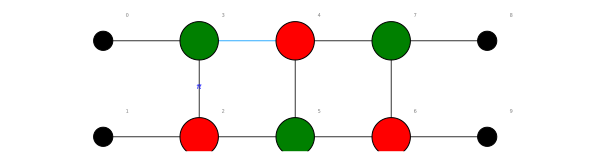

In [85]:
g = c.to_graph()
#zx.simplify.clifford_simp(g)
g.add_edge_table({(3,4):(0,1)})
zx.draw(g,labels=True)

In [88]:
a = Fraction(3,2)
a/2

Fraction(3, 4)

In [80]:
g.to_matrix(preserve_scalar=True)

matrix([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [74]:
g.scalar

Scalar(0.35+0.00j = sqrt(2)^-3)

In [36]:
s.add_phase(Fraction(1,2))
s.add_node(Fraction(1,4))
print(s)

-1.41+3.41j = exp(1/2ipi)sqrt(2)^2(1+exp(1/4ipi))


In [37]:
divmod(5,2)

(2, 1)

In [32]:
import cmath
1+cmath.exp(math.pi*Fraction(1,4))

(3.1932800507380152+0j)

In [31]:
s.phasenodes

[Fraction(1, 4)]

In [11]:
t = c.to_tensor()
t*= math.sqrt(2)
t

array([[[[1.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j]],

        [[0.+0.j, 1.+0.j],
         [0.+0.j, 0.+0.j]]],


       [[[0.+0.j, 0.+0.j],
         [0.+0.j, 1.+0.j]],

        [[0.+0.j, 0.+0.j],
         [1.+0.j, 0.+0.j]]]])

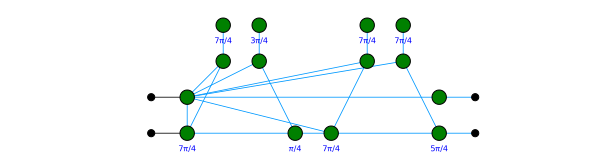

In [9]:
g = c.copy()
zx.simplify.full_reduce(g)
g.normalise()
zx.draw(g)

In [12]:
print(g.to_matrix())

[[-0.-0.125j  0.+0.j     0.+0.j     0.+0.j   ]
 [ 0.+0.j    -0.-0.125j  0.+0.j     0.+0.j   ]
 [ 0.+0.j     0.+0.j    -0.-0.125j  0.+0.j   ]
 [ 0.+0.j     0.+0.j    -0.-0.j    -0.-0.125j]]


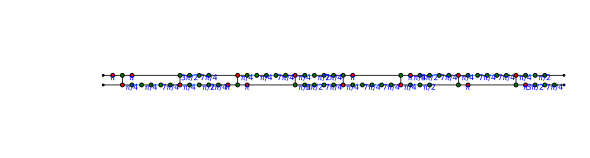

In [7]:
c = zx.Circuit.load(r'C:\Users\John\Desktop\18.qc')
zx.draw(c)

In [13]:
g = zx.Graph()
g = zx.quantomatic.edit_graph(g)

Opening Quantomatic...
Done


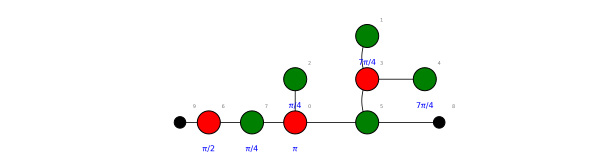

In [15]:
zx.draw(g,labels=True)

In [16]:
g.auto_detect_inputs()
g.inputs, g.outputs

([9], [8])

In [22]:
print(g.to_matrix())

[[1.-0.j 0.+0.j]
 [1.-0.j 1.-0.j]]


In [18]:
g = zx.quantomatic.edit_graph(g)

Opening Quantomatic...
Done


In [19]:
g.inputs,g.outputs

([9], [8])

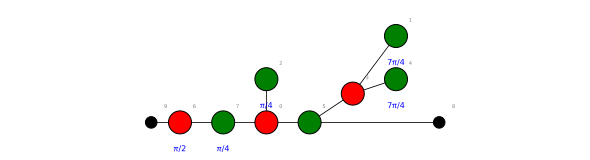

In [21]:
print()

In [9]:
d = zx.Circuit(2)
print(zx.compare_tensors(c,d))

True


In [4]:
g = c_orig.to_graph()
g = zx.simplify.teleport_reduce(g,quiet=False)
print(zx.tcount(g))
#c = zx.extract.streaming_extract(g).to_basic_gates()
c_opt = zx.extract.streaming_extract(g).to_basic_gates()
c_opt = zx.optimize.basic_optimization(c_opt,quiet=False).to_basic_gates()
c_id = c_orig.adjoint()
c_id.add_circuit(c_opt)
g = c_id.to_graph()
zx.simplify.full_reduce(g)
if g.num_vertices() == 2*len(g.inputs):
    print("yay")
else: print("Nope")
#c_orig.verify_equality(c)

spider_simp: 1786. 1414. 600. 369. 296. 233. 48. 23. 13. 7. 7. 3. 3. 1. 1.  15 iterations
id_simp: 1403. 650. 332.  3 iterations
spider_simp: 315. 33. 27.  3 iterations
id_simp: 60.  1 iterations
spider_simp: 16. 14. 9. 6. 5. 3. 3. 3. 1.  9 iterations
pivot_simp: 47.  1 iterations
lcomp_simp: 214. 214.  2 iterations
id_simp: 5.  1 iterations
spider_simp: 4.  1 iterations
pivot_simp: 2. 1.  2 iterations
lcomp_simp: 2. 2.  2 iterations
pivot_gadget_simp: 1485. 704. 486. 250. 168. 101. 62. 41. 22. 18. 10. 8. 2. 2.  14 iterations
id_simp: 682.  1 iterations
spider_simp: 74. 38. 45. 26. 23. 21. 20. 15. 15. 16. 15. 12. 12. 12. 13. 11. 12. 13. 11. 14. 10. 11. 13. 9. 10. 11. 10. 9. 9. 8. 7. 9. 8. 7. 8. 6. 5. 6. 7. 6. 6. 5. 5. 6. 5. 4. 4. 3. 3. 3. 3. 3. 3. 3. 1. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1.  73 iterations
pivot_simp: 12. 2.  2 iterations
lcomp_simp: 89. 91. 38. 36. 12. 15. 6. 3. 2. 2. 1. 1.  12 iterations
id_simp: 41.  1 iterations
spider_simp: 12. 6. 2. 2. 2. 1. 1. 1. 

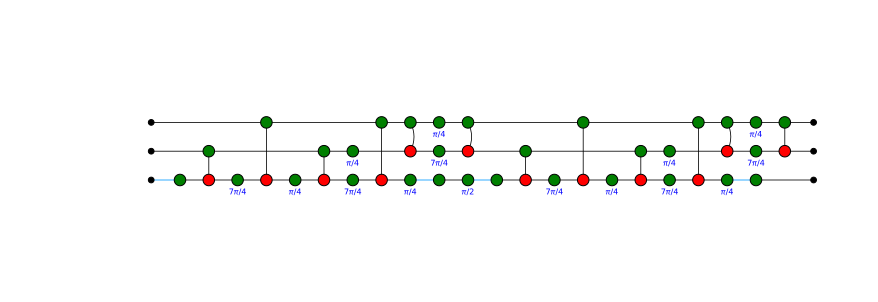

In [27]:
c = zx.Circuit(3)
c.add_gate("TOF",0,1,2)
#t = t.to_basic_gates().adjoint()
c.add_gate("S",2)
c.add_gate("TOF",0,1,2)
#c.add_gate("S",2)
#c.add_gate("TOF",0,1,2)
#c.add_gate("S",2,adjoint=True)
#c.add_gate("TOF",0,1,2)
#c.add_gate("S",2,adjoint=True)
#c.add_circuit(t)
#c.add_gate("T",2)
zx.draw(c,figsize=(12,4))

In [14]:
print(c.to_qc())

.v q0 q1 q2

BEGIN
Z q0 q1 q2
T q2
Z q0 q1 q2
T q2
Z q0 q1 q2
T* q2
Z q0 q1 q2
T* q2
END



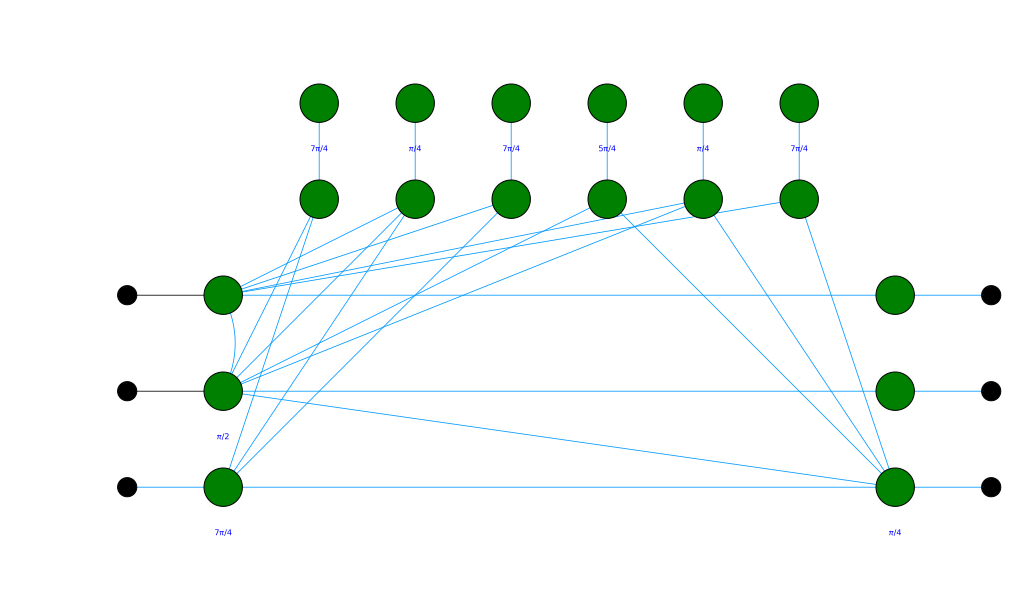

In [28]:
g = c.to_graph()
zx.full_reduce(g)
g.normalise()
zx.draw(g,figsize=(14,8))

In [25]:
d = zx.Circuit(3)
zx.compare_tensors(c,d)

True

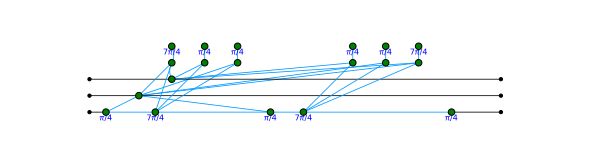

In [7]:
g = c.to_graph()
zx.full_reduce(g)
zx.draw(g)

In [5]:
zx.todd.TOPT_LOCATION = ['C:\\WINDOWS\\SysNative\\wsl', '/mnt/c/Users/John/Documents/Projects/pyzx/TOpt']
c2 = zx.optimize.full_optimize(c_opt,quiet=False)

1.new block
TOpt: : 0.015625
new block
TOpt: : 0.578125
new block
TOpt: : 0.484375
new block
TOpt: : 0.421875
new block
TOpt: : 0.328125
new block
TOpt: : 0.25
new block
TOpt: : 0.1875
new block
TOpt: : 0.1875
new block
TOpt: : 0.109375
new block
TOpt: : 0.21875
new block
TOpt: : 0.109375
new block
TOpt: : 0.15625
new block
TOpt: : 0.15625
new block
TOpt: : 0.125
new block
TOpt: : 0.1875
new block
TOpt: : 0.296875
new block
TOpt: : 0.28125
new block
TOpt: : 0.25
new block
TOpt: : 0.140625
new block
TOpt: : 0.171875
new block
TOpt: : 0.171875
new block
TOpt: : 0.109375
new block
TOpt: : 0.109375
new block
TOpt: : 0.09375
new block
TOpt: : 0.09375
new block
TOpt: : 0.21875
new block
TOpt: : 0.09375
new block
TOpt: : 0.203125
new block
TOpt: : 0.265625
new block
TOpt: : 0.5
new block
TOpt: : 0.109375
new block
TOpt: : 0.171875
new block
TOpt: : 0.375
new block
TOpt: : 0.546875
new block
TOpt: : 0.4375
new block
TOpt: : 0.140625
new block
TOpt: : 0.109375
new block
TOpt: : 0.09375
new bloc

In [8]:
print(c2.stats())

Circuit  on 35 qubits with 18776 gates.
        1797 is the T-count
        16979 Cliffords among which 
        14842 2-qubit gates and 618 Hadamard gates.


In [9]:
print(c_opt.stats())

Circuit  on 35 qubits with 6579 gates.
        1797 is the T-count
        4782 Cliffords among which 
        3102 2-qubit gates and 624 Hadamard gates.


In [ ]:
c_opt.split

In [29]:
zx.compare_tensors(c_orig,c_opt)

False

In [26]:
from pyzx.simplify import spider_simp, id_simp, to_gh, pivot_simp, lcomp_simp, pivot_gadget_simp, gadget_simp
random.seed(470595)
quiet=False
circ = zx.generate.cliffordT(3,80,p_t=0.2)
g = circ.copy()
to_gh(g)
id_simp(g,quiet=True)
spider_simp(g,quiet=True)
id_simp(g,quiet=True)
spider_simp(g,quiet=True)
#id_simp(g,quiet=True)
#spider_simp(g,quiet=True)
#pivot_simp(g,quiet=True)
#lcomp_simp(g,quiet=True)
#pivot_gadget_simp(g,quiet=True)
#gadget_simp(g,quiet=True)

# id_simp(g,quiet=quiet)
#zx.simplify.full_reduce(g,quiet=False)
s = zx.simplify.Simplifier(g)
s.full_reduce(quiet)
zx.compare_tensors(s.mastergraph,s.simplifygraph)

pivot_simp: 5. 1. 1.  3 iterations
lcomp_simp: 13. 2.  2 iterations
id_simp: 1.  1 iterations
pivot_simp: 1. 1.  2 iterations
pivot_gadget_simp: 3. 1.  2 iterations
gadget_simp: 2.  1 iterations
id_simp: 2.  1 iterations
spider_simp: 2.  1 iterations
pivot_simp: 1.  1 iterations


True

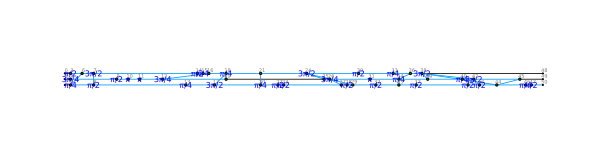

pivot_gadget_simp: 9. 2. 1. 1. 1.  5 iterations


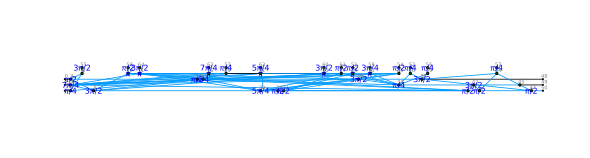

gadget_simp: 4.  1 iterations


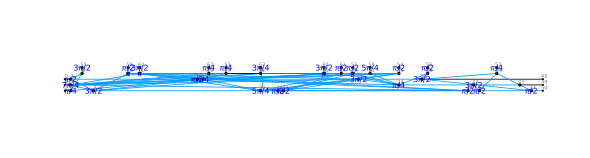

In [35]:
g2 = g.copy()
display(zx.draw(g2,labels=True))
pivot_gadget_simp(g2)
display(zx.draw(g2,labels=True))
gadget_simp(g2)
display(zx.draw(g2,labels=True))

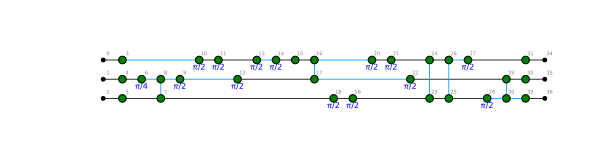

In [16]:
zx.draw(s.mastergraph,labels=True)

In [ ]:
zx.draw(g2)

In [235]:
zx.compare_tensors(g,g2)

True

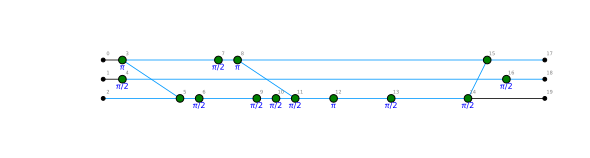

In [224]:
zx.draw(s.mastergraph,labels=True)

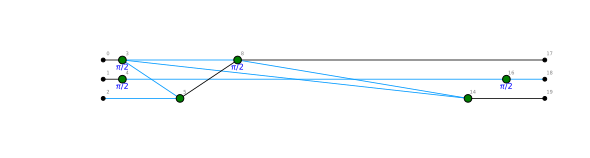

In [225]:
#id_simp(g,quiet=False)
zx.draw(s.simplifygraph,labels=True)

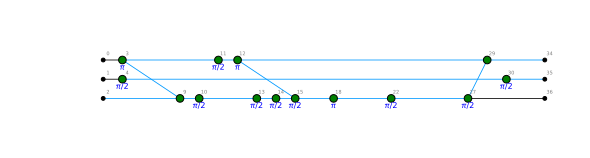

In [216]:
zx.draw(g,labels=True)

In [51]:
def gadget_H(c):
    try:
        # turn the last HAD into a CZ
        i = next(i for i in reversed(range(len(c.gates))) if c.gates[i].name == 'HAD')
        c.qubits += 1
        q = c.gates[i].target
        c.gates[i] = zx.circuit.CZ(q, q+1)
        
        # before gadget: nudge every qubit to the right of HAD over by 1
        for j in range(0,i):
            g = c.gates[j]
            if g.target > q: g.target += 1
            if hasattr(g, 'control') and g.control > q: g.control += 1
        
        # after gadget: nudge HAD's qubit and all qubits to the right of HAD over by 1
        for j in range(i+1,len(c.gates)):
            g = c.gates[j]
            if g.target >= q: g.target += 1
            if hasattr(g, 'control') and g.control >= q: g.control += 1
        
        return i
    except StopIteration:
        return None

def gadget_all_H(c):
    while gadget_H(c) != None: pass

In [89]:
def hcap_optimize(c,hcap):
    total = 0
    parsed = []
    hcount = 0
    blocks = 0
    for g in c.gates:
        if g.name == 'HAD':
            if hcount == hcap:
                new_c = zx.Circuit(c.qubits)
                new_c.gates = [h.copy() for h in parsed]
                gadget_all_H(new_c)
                print("block", blocks)
                opt_c = zx.optimize.phase_block_optimize(new_c, pre_optimize=False,quiet=True)
                print("tcount:", new_c.tcount(), "-->", opt_c.tcount())
                total += opt_c.tcount()
                hcount = 0
                blocks += 1
                parsed = []
            else:
                parsed.append(g)
                hcount += 1
        else:
            parsed.append(g)
    if parsed:
        new_c = zx.Circuit(c.qubits)
        new_c.gates = [h.copy() for h in parsed]
        gadget_all_H(new_c)
        print("block", blocks)
        opt_c = zx.optimize.phase_block_optimize(new_c, pre_optimize=False,quiet=True)
        print("tcount:", new_c.tcount(), "-->", opt_c.tcount())
        total += opt_c.tcount()
    return total

In [90]:
zx.todd.TOPT_LOCATION = ['C:\\WINDOWS\\SysNative\\wsl', '/mnt/c/Users/John/Documents/Projects/pyzx/TOpt']
#zx.todd.TOPT_LOCATION = None

In [101]:
circ_name = r'../circuits/Fast/barenco_tof_10_before'
c_orig = zx.Circuit.load(circ_name)
g = c_orig.to_graph()
print(zx.tcount(g))
g = zx.simplify.teleport_reduce(g)
c = zx.Circuit.from_graph(g).to_basic_gates()
#c = c_orig.to_basic_gates().copy()
print(c.stats())
c = zx.optimize.basic_optimization(c.split_phase_gates())
c = zx.optimize.basic_optimization(c.to_basic_gates())
print(c.to_basic_gates().stats())

hcap_optimize(c,15)

224
Circuit  on 19 qubits with 445 gates.
        100 is the T-count
        345 Cliffords among which 
        192 2-qubit gates and 98 Hadamard gates.
Circuit  on 19 qubits with 365 gates.
        100 is the T-count
        265 Cliffords among which 
        176 2-qubit gates and 34 Hadamard gates.
block 0
tcount: 48 --> 48
block 1
tcount: 39 --> 39
block 2
tcount: 13 --> 13


100

In [84]:
c2 = zx.optimize.phase_block_optimize(c.to_basic_gates(), pre_optimize=False,quiet=True)

In [85]:
print(c2.stats())

Circuit  on 19 qubits with 660 gates.
        100 is the T-count
        560 Cliffords among which 
        464 2-qubit gates and 34 Hadamard gates.


In [25]:
import os
import platform
import subprocess

is32bit = (platform.architecture()[0] == '32bit')
system32 = os.path.join(os.environ['SystemRoot'], 
                        'SysNative' if is32bit else 'System32')
bash = os.path.join(system32, 'wsl')

subprocess.check_output('"%s" ls' % bash)

b'ak.ipynb\ncython-test.ipynb\nJohnDoodle.ipynb\nLinalg.ipynb\nOptimize.ipynb\nwhat_are_these.txt\n'

In [26]:
bash

'C:\\WINDOWS\\SysNative\\wsl'

In [5]:
c4 = zx.optimize.phase_block_optimize(c, pre_optimize=False,quiet=False)
print(c4.stats())

new block
new block
new block
new block
new block
new block
new block
new block
new block
Circuit  on 7 qubits with 122 gates.
        28 is the T-count
        94 Cliffords among which 
        68 2-qubit gates and 10 Hadamard gates.


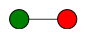

We will now set the phase of the spiders to a different value:


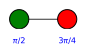

In [113]:
import pyzx as zx  #  This is the recommended way to import PyZX
g = zx.Graph()  #  We construct an empty ZX-diagram
v = g.add_vertex(1,0,0)  #  We add a single Z-spider at position (0,0)
w = g.add_vertex(2,0,1)  #  We add a single X-spider at position (0,1)
g.add_edge((v,w))        #  We connect the two spiders together
display(zx.draw(g,figsize=(1,0.3))) #  Draw the ZX-diagram onto the screen
print("We will now set the phase of the spiders to a different value:")
from fractions import Fraction    #   For this we need the Fraction class
g.set_phase(v,Fraction(1,2))      # The phase is set as a multiple of pi
g.set_phase(w,Fraction(3,4))
display(zx.draw(g,figsize=(1,0.3)))

In [114]:
g.to_tensor()

KeyError: 0

In [115]:
with open("../circuits/2-qubit-unitary.qgraph",'r') as f:
    g = zx.json_to_graph(f.read())

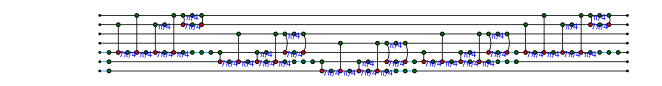

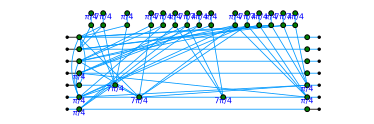

In [127]:
c = zx.Circuit.load("../circuits/Fast/tof_4_before")
display(zx.draw(c,figsize=(9,1)))
g = c.to_graph()
zx.simplify.full_reduce(g)
g.normalise()
display(zx.draw(g,figsize=(5,1.5)))

In [ ]:
zx.quantomatic.quantomatic_location

# Hadamard to Internal Vertices comparison

In [80]:
from pyzx.circuit import ZPhase
def count_internal_hadamards(c):
    count = 0
    tracking = dict()
    for g in c.gates:
        if g.name == 'HAD':
            if g.target not in tracking: continue
            else: tracking[g.target] += 1
        if isinstance(g, ZPhase) and g.phase.denominator > 2:
            if g.target in tracking: 
                count += tracking[g.target]
            tracking[g.target] = 0
    return count

def count_all_hadamards(c):
    return sum(1 for g in c.gates if g.name == 'HAD')

In [14]:
def count_internal_vertices(g):
    count = 0
    for v in g.vertices():
        if v in g.inputs or v in g.outputs: continue
        if len(list(g.neighbours(v))) == 1: continue
        should_continue = False
        for w in g.neighbours(v):
            if len(list(g.neighbours(w))) == 1:
                should_continue = True
                break
        if should_continue: continue
        count += 1
    return count

In [13]:
c = zx.optimize.basic_optimization(c_orig.to_basic_gates()).to_basic_gates()

count_internal_hadamards(c)

6

In [15]:
count_internal_vertices(g)

5

In [13]:
def generate_random_circuit(qubits, depth, p_had, p_t, clifford=False):
    p_cnot = 1-p_had-p_t
    c = zx.Circuit(qubits)
    for _ in range(depth):
        r = random.random()
        if r > 1-p_had:
            c.add_gate("HAD",random.randrange(qubits))
        elif r > 1-p_had-p_t:
            if not clifford: c.add_gate("T",random.randrange(qubits))
            else: c.add_gate("S",random.randrange(qubits))
        else:
            tgt = random.randrange(qubits)
            while True:
                ctrl = random.randrange(qubits)
                if ctrl!=tgt: break
            c.add_gate("CNOT",tgt,ctrl)
    return c

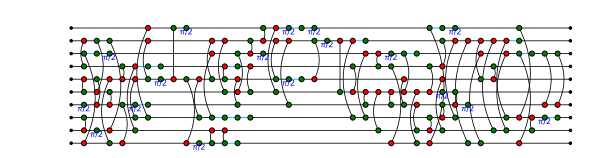

In [18]:
c = generate_random_circuit(10,100,p_had=0.2,p_t=0.2,clifford=True)
zx.draw(c)

In [19]:
g = c.to_graph()
zx.simplify.clifford_simp(g,quiet=True)
g.normalise()
zx.d3.draw(g)

In [116]:
count_all_hadamards(c)

14

In [117]:
count_internal_vertices(g)

9

In [102]:
def generate_data_point(qubits, depth, p_had, p_t):
    c = generate_random_circuit(qubits, depth, p_had, p_t)
    c = zx.optimize.basic_optimization(c).to_basic_gates()
    had = count_all_hadamards(c)
    g = c.to_graph()
    zx.simplify.full_reduce(g)
    vert = count_internal_vertices(g)
    return (had,vert)

x,y = [],[]
for i in range(1,101):
    had,vert = generate_data_point(15, 50+i*10, p_had = 0.1, p_t = 0.15)
    x.append(had)
    y.append(vert)
    if i%10 == 0: print(i,end='. ')

10. 20. 30. 40. 50. 60. 70. 80. 90. 100. 

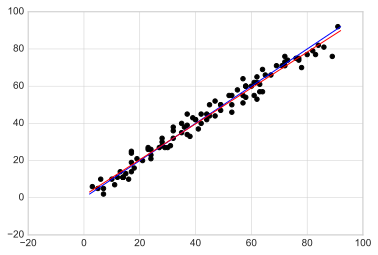

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn-whitegrid')
x = np.array(x)
y = np.array(y)
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

mi = min([min(x),min(y)])
ma = max([max(x),max(y)])
plt.scatter(x, y,color='black')
plt.plot([mi,ma],[mi,ma],'-',color='blue')
xfit = np.linspace(mi,ma,100)
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit,yfit,'-',color='red');

In [108]:
model.coef_

array([0.96390216])

# Experimental extraction code

In [12]:
from pyzx import Graph, tcount
from pyzx.extract import bi_adj, connectivity_from_biadj, permutation_as_swaps
from pyzx.linalg import column_optimal_swap

def extract(g, quiet=True):
    g.normalise()
    qs = g.qubits() # We are assuming that these are objects that update...
    rs = g.rows()   # ...to reflect changes to the graph, so that when...
    ty = g.types()  # ... g.set_row/g.set_qubit is called, these things update directly to reflect that
    phases = g.phases()
    
    h = Graph()
    
    qindex = {}
    depth = 0
    for i in range(len(g.inputs)):
        v = h.add_vertex(0,i,depth)
        h.inputs.append(v)
        qindex[i] = v
    depth = 1
    
    def add_phase_gate(q, phase):
        nonlocal depth
        v = h.add_vertex(1, q, depth, phase)
        h.add_edge((qindex[q],v),1)
        qindex[q] = v
        depth += 1
        return v
    def add_hadamard(q):
        nonlocal depth
        v = h.add_vertex(1, q, depth)
        h.add_edge((qindex[q],v),2)
        qindex[q] = v
        depth += 1
        return v
    def add_cnot(ctrl, tgt):
        nonlocal depth
        v1 = h.add_vertex(1, ctrl, depth)
        v2 = h.add_vertex(2, tgt, depth)
        h.add_edges([(qindex[ctrl],v1),(qindex[tgt],v2),(v1,v2)],1)
        qindex[ctrl] = v1
        qindex[tgt] = v2
        depth += 1
        return v1,v2
    def add_cz(ctrl, tgt):
        nonlocal depth
        v1 = h.add_vertex(1, ctrl, depth)
        v2 = h.add_vertex(1, tgt, depth)
        h.add_edges([(qindex[ctrl],v1),(qindex[tgt],v2)],1)
        h.add_edge((v1,v2),2)
        qindex[ctrl] = v1
        qindex[tgt] = v2
        depth += 1
        return v1,v2
    
    def add_gadget(targets, phase):
        nonlocal depth
        verts = {q:h.add_vertex(1,q,depth) for q in targets}
        axel = h.add_vertex(2,-1,depth+0.5)
        leaf = h.add_vertex(1,-2,depth+0.5,phase)
        h.add_edges([(qindex[q],verts[q]) for q in targets] + [(verts[q],axel) for q in targets] + [(axel,leaf)], 1)
        for q in targets: qindex[q] = verts[q]
        depth += 1
        return targets, axel, leaf
    
    def add_nonlocal_gadget(qubits, vertices, phase):
        nonlocal depth
        new_verts = {q:h.add_vertex(1,q,depth) for q in qubits}
        axel = h.add_vertex(2,-1,depth+0.5)
        leaf = h.add_vertex(1,-2,depth+0.5,phase)
        h.add_edges([(qindex[q],new_verts[q]) for q in qubits] + [(new_verts[q],axel) for q in qubits] + 
                    [(v,axel) for v in vertices] + [(axel,leaf)], 1)
        for q in qubits: qindex[q] = new_verts[q]
        depth += 1
        return new_verts, axel, leaf
    
    leftrow = 1
    #maxq = max(qs.values()) + 1
    
    gadgets = {}
    nodes = []
    for v in g.vertices():
        if rs[v] > 1: g.set_row(v, rs[v]+20)
        if v in g.inputs or v in g.outputs: continue
        if len(list(g.neighbours(v))) == 1: #phase gadget
            n = list(g.neighbours(v))[0]
            gadgets[n] = v
        elif all(w in g.inputs or w in g.outputs or len(list(g.neighbours(w)))!=1 for w in g.neighbours(v)): # regular vertex
            nodes.append(v)
    
    nodestotal = len(nodes)
    nodesparsed = 0
    nodestotal = 19
    
    processed_targets = {}
    while True:
        left = [v for v in g.vertices() if rs[v] == leftrow]
        for v in left:
            # First we add the gates to the circuit that can be processed now,
            # and we simplify the graph to represent this.
            q = qs[v]
            phase = phases[v]
            t = ty[v]
            if t != 1: raise TypeError("Only supports zx-diagrams in graph-like state")
            neigh = [w for w in g.neighbours(v) if rs[w]<leftrow]
            if len(neigh) != 1:
                raise TypeError("Graph doesn't seem circuit like: multiple parents")
            n = neigh[0]
            if qs[n] != q:
                raise TypeError("Graph doesn't seem circuit like: cross qubit connections")
            if g.edge_type(g.edge(n,v)) == 2:
                add_hadamard(q)
                g.set_edge_type(g.edge(n,v),1)
            #if t == 0: continue # it is an output
            if phase != 0:
                add_phase_gate(q, phase)
                g.set_phase(v, 0)
        
        boundary_verts = []
        neighbours = set()
        for v in left:
            q = qs[v]
            neigh = [w for w in g.neighbours(v) if rs[w]==leftrow and w<v]
            for n in neigh:
                q2 = qs[n]
                if g.edge_type(g.edge(v,n)) != 2:
                    raise TypeError("Invalid vertical connection between vertices of the same type")
                add_cz(q2, q)
                g.remove_edge(g.edge(v,n))
            d = [w for w in g.neighbours(v) if rs[w]>leftrow]
            neighbours.update(d)
        
        for w in neighbours:
            if w in gadgets:
                tgts = set(g.neighbours(w))
                tgts.remove(gadgets[w])
                if tgts.issubset(left):
                    add_gadget([qs[v] for v in tgts], phases[gadgets[w]])
                    g.remove_vertex(gadgets[w])
                    g.remove_vertex(w)
                elif tgts.issubset(left+list(processed_targets.keys())):
                    qubits = [qs[v] for v in left if v in tgts]
                    verts = [processed_targets[v] for v in tgts if v in processed_targets]
                    add_nonlocal_gadget(qubits,verts, phases[gadgets[w]])
                    g.remove_vertex(gadgets[w])
                    g.remove_vertex(w)
        neighbours = set()
        for v in left.copy():
            d = [w for w in g.neighbours(v) if rs[w]>leftrow]
            if any(w in g.outputs for w in d):
                if len(d) == 1:
                    left.remove(v)
                    continue
                b = [w for w in d if w in g.outputs][0]
                if all(w in gadgets or w==b for w in d):
                    processed_targets[v] = add_phase_gate(qs[v],0)
                    left.remove(v)
                    continue
                else:
                    q = qs[b]
                    r = rs[b]
                    w = g.add_vertex(1,q,r-1)
                    nodes.append(w)
                    e = g.edge(v,b)
                    et = g.edge_type(e)
                    g.remove_edge(e)
                    g.add_edge((v,w),2)
                    g.add_edge((w,b),3-et)
                    d.remove(b)
                    d.append(w)
            neighbours.update(d)
                
        if not left: break # We are done
        right = [w for w in neighbours if w in nodes]
        m = bi_adj(g,right,left)
        #print(m)
#         target = column_optimal_swap(m)
#         right = [right[j] for (i,j) in sorted(target,key=lambda x:x[0])]
#         m = bi_adj(g,right,left)
#         print()
#         print(m)
        neighbours.difference_update(right)
        neighbours = right + list(neighbours)
        cnots = m.to_cnots()
        m2 = bi_adj(g, neighbours, left)
        for cnot in cnots:
            m.row_add(cnot.target,cnot.control)
            m2.row_add(cnot.target, cnot.control)
            add_cnot(qs[left[cnot.control]],qs[left[cnot.target]])
        connectivity_from_biadj(g,m2,neighbours,left)
        good_verts = {}
        for i, row in enumerate(m.data):
            if sum(row) == 1:
                v = left[i]
                w = right[[j for j in range(len(m.data[i])) if m.data[i][j]][0]]
                good_verts[v] = w
        if not good_verts:
            print(m)
            print(left)
            print(right)
            print(nodes)
            raise Exception("No good match found")
        for v in left:
            if v not in good_verts:
                g.set_row(v,leftrow+1)
            else:
                g.set_row(good_verts[v],leftrow+1)
                g.set_qubit(good_verts[v],qs[v])
                if len(list(g.neighbours(v))) > 2: # Gadgets are still connected to it
                    w = add_phase_gate(qs[v],0)
                    processed_targets[v] = w
        leftrow += 1
        if leftrow >= nodestotal:
            nodestotal += 20
            for v in g.vertices():
                if rs[v] > leftrow: g.set_row(v,rs[v]+20)
    # We are done processing now. Time to deal with swaps.
    swap_map = {}
    for w in g.outputs:
        v = list(g.neighbours(w))[0]
        if g.edge_type(g.edge(v,w)) == 2:
            add_hadamard(qs[v])
            g.set_edge_type(g.edge(v,w),1)
        swap_map[qs[v]] = qs[w]
    for t1, t2 in permutation_as_swaps(swap_map):
        add_cnot(t1,t2)
        add_cnot(t2,t1)
        add_cnot(t1,t2)
    
    for i in range(len(g.outputs)):
        v = h.add_vertex(0,i,depth)
        h.outputs.append(v)
        h.add_edge((qindex[i],v),1)
        qindex[i] = v
    
    return h

spider_simp: 12. 10. 7. 3. 2.  5 iterations
id_simp: 15. 5.  2 iterations
spider_simp: 2.  1 iterations
pivot_simp: 3. 1.  2 iterations
lcomp_simp: 3. 2. 1.  3 iterations
id_simp: 1.  1 iterations


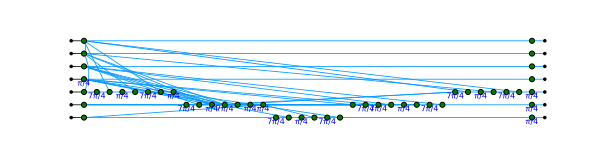

In [28]:
g = c_orig.to_graph()
g = zx.simplify.teleport_reduce(g)
zx.simplify.interior_clifford_simp(g)
#zx.simplify.full_reduce(g)
g.normalise()
zx.draw(g)
#zx.optimize.basic_optimization

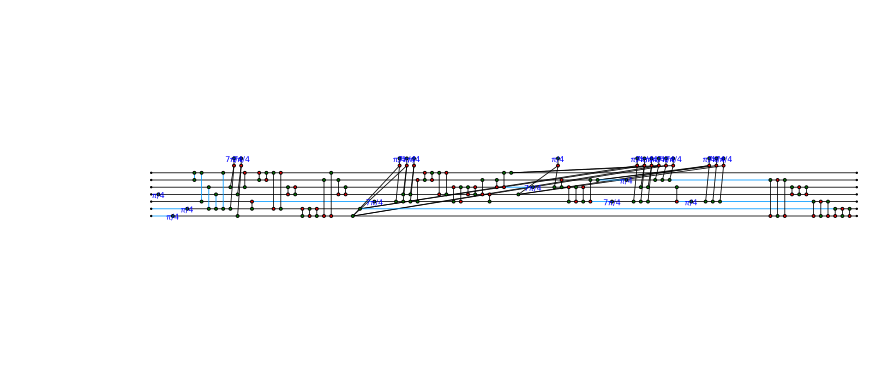

In [20]:
g2 = g.copy()
h = extract(g2)
zx.id_simp(h,quiet=True)
zx.draw(h,figsize=(12,5))
# m2 = m.copy()
# m2.gauss(full_reduce=True)
# print(m2)

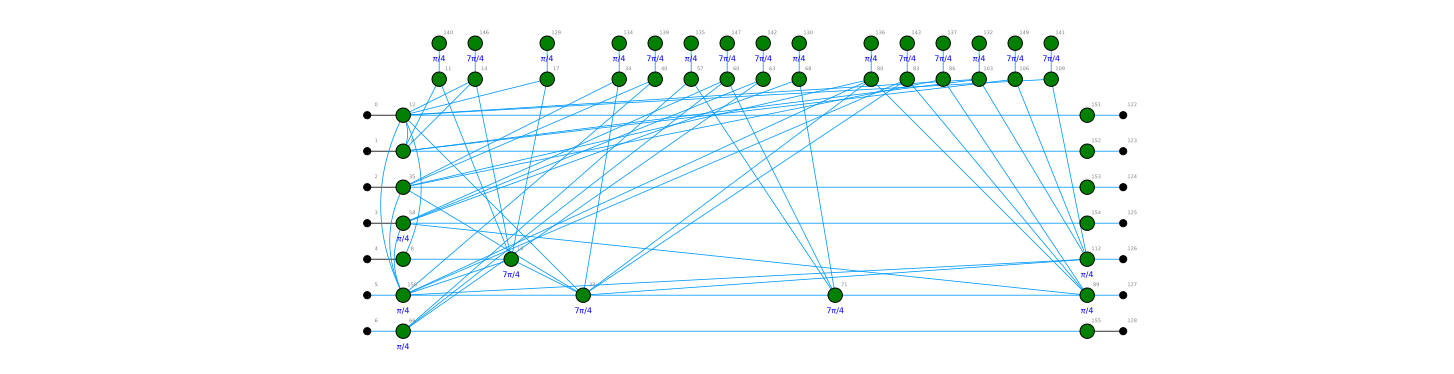

In [17]:
zx.draw(g, figsize=(20,5),labels=True)

In [18]:
print(h)

Graph(180 vertices, 243 edges)


In [120]:
zx.compare_tensors(h,c_orig)

True

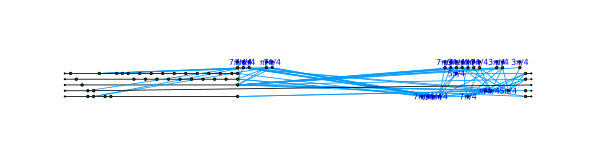

In [161]:
zx.draw(g2)

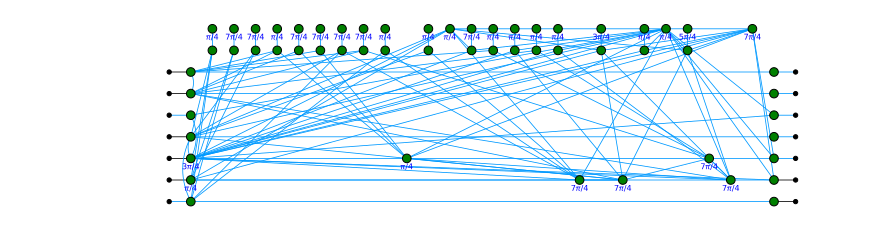

In [167]:
def sort_gadgets(g):
    rs = g.rows()
    ty = g.types()
    gadgets = {}
    for v in g.vertices():
        if len(list(g.neighbours(v))) == 1 and ty[v]==1:
            w = list(g.neighbours(v))[0]
            score = sum(rs[n] for n in g.neighbours(w))/len(list(g.neighbours(w)))
            gadgets[(w,v)] = score
    
    l = list(gadgets.items())
    l = sorted(l, key=lambda x: x[1])
    for i in range(len(l)):
        v,w = l[i][0]
        g.set_row(v, i+1.5)
        g.set_row(w, i+1.5)
    
sort_gadgets(g)
g.normalise()
zx.draw(g,figsize=(12,3))

# Todd on graph

In [8]:
from pyzx.circuit import ZPhase
from pyzx.linalg import Mat2
from pyzx.todd import todd_iter, MultiLinearPoly
#zx.todd.TOPT_LOCATION = os.path.expanduser("~/projects/pyzx/TOpt")
zx.todd.USE_REED_MULLER = False

def todd_on_graph(g):
    gadgets = {}
    t_nodes = []
    for v in g.vertices():
        if v not in g.inputs and v not in g.outputs and len(list(g.neighbours(v)))==1:
            if g.phase(v) != 0 and g.phase(v).denominator != 4: continue
            n = list(g.neighbours(v))[0]
            tgts = frozenset(set(g.neighbours(n)).difference({v}))
            gadgets[tgts] = (n,v)
        if g.phase(v) != 0 and g.phase(v).denominator == 4:
            t_nodes.append(v)
    
    if not gadgets:
        print("No phase gadgets found")
        return
    variables = set()
    for par in gadgets.keys():
        variables.update(par)
    
    for v in variables:
        if v in t_nodes:
            gadgets[frozenset({v})] = (v,v)
    
    targets = list(variables)
    n = len(targets)

    cols = []
    for par, (_,v) in gadgets.items():
        col = [0]*n
        for t in par:
            col[targets.index(t)] = 1
        phase = g.phase(v)
        for i in range(phase.numerator): cols.append(col)
        #cols.append(col)
    parmatrix = Mat2(cols).transpose()
    print(parmatrix.rows(), parmatrix.cols())
    #print(parmatrix)
    m2 = todd_iter(parmatrix)
    print(m2.rows(), m2.cols())
    
    newgadgets = []
    phases = dict()
    for col in m2.transpose().data:
        if sum(col) == 1:
            i = next(i for i,a in enumerate(col) if a)
            v = targets[i]
            if v in t_nodes:
                phases[v] = Fraction(1,4)
            else:
                phases[v] = g.phase(v) + Fraction(1,4)
        else:
            newgadgets.append(frozenset([targets[i] for i,a in enumerate(col) if a]))
    
    p = zx.todd.MultiLinearPoly()
    p.add_par_matrix(parmatrix,False)
    p.add_par_matrix(m2,True)
    correction = p.to_clifford()
    add_czs = {}
    for clif in correction:
        if isinstance(clif, ZPhase):
            v = targets[clif.target]
            if v in phases:
                phases[v] += clif.phase
            else:
                if v in t_nodes:
                    phases[v] = clif.phase
                else:
                    phases[v] = g.phase(v) + clif.phase
        elif clif.name == 'CZ':
            v1,v2 = targets[clif.control], targets[clif.target]
            add_czs[(v1,v2)] = (0,1)
    
    for v in targets:
        if v in phases:
            g.set_phase(v, phases[v])
        else:
            if v in t_nodes:
                g.set_phase(v, 0)
    g.add_edge_table(add_czs)
    
    rs = g.rows()
    positions = set()
    for gadget, (n,v) in gadgets.items():
        if len(gadget) == 1: continue # T-node
        if gadget in newgadgets:
            positions.add(rs[v])
            g.set_phase(v, Fraction(1,4))
            newgadgets.remove(gadget)
        else:
            g.remove_vertices((n,v))
    
    edges = []
    for par in newgadgets:
        pos = sum(rs[t] for t in par)/len(par) + 0.5
        while pos in positions: pos += 0.5
        n = g.add_vertex(1, -1, pos)
        v = g.add_vertex(1, -2, pos, phase=Fraction(1,4))
        edges.append((n,v))
        positions.add(pos)
        for t in par: edges.append((n,t))
    g.add_edges(edges, 2)
    

g2 = g.copy()
#display(zx.draw(g2,labels=True))
zx.todd.todd_on_graph(g2)
zx.full_reduce(g2)
g2.normalise()
print(zx.tcount(g2))
# todd_on_graph(g2)
# zx.full_reduce(g2)
# g2.normalise()
# print(zx.tcount(g2))
#zx.draw(g2)

13


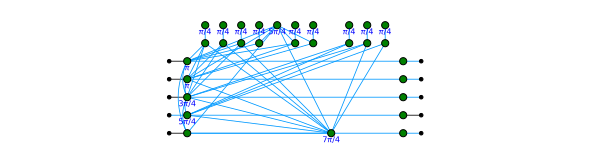

In [6]:
zx.draw(g2)

10
4
4


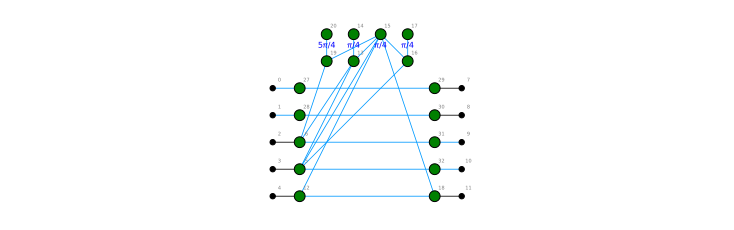

In [10]:
g3 = g2.copy()
try: c2 = zx.extract.streaming_extract(g3,allow_ancillae=True,quiet=True)
except: pass
print(zx.tcount(g3))
g3 = g3.adjoint()
try: c2 = zx.extract.streaming_extract(g3,allow_ancillae=True,quiet=True)
except: pass
zx.simplify.id_simp(g3, quiet=True)
g3.normalise()
print(zx.tcount(g3))
g3 = g3.adjoint()
try: c2 = zx.extract.streaming_extract(g3,allow_ancillae=True,quiet=True)
except: pass
zx.simplify.id_simp(g3, quiet=True)
g3.normalise()
print(zx.tcount(g3))
#zx.simplify.id_simp(g3, quiet=True)
zx.draw(g3,figsize=(10,3),labels=True)

In [3]:
random.seed(1344)
g = zx.generate.cliffordT(4,350,p_t=0.010)
zx.id_simp(g,quiet=True)
c = zx.Circuit.from_graph(g)
print(c.stats())
c2 = zx.optimize.basic_optimization(c.split_phase_gates())
print(c2.stats())
#zx.draw(c2,figsize=(25,5))

Circuit  on 4 qubits with 350 gates.
        4 is the T-count
        346 Cliffords among which 
        109 2-qubit gates and 0 Hadamard gates.
Circuit  on 4 qubits with 195 gates.
        4 is the T-count
        191 Cliffords among which 
        86 2-qubit gates and 43 Hadamard gates.


spider_simp: 58. 37. 17. 11. 4.  5 iterations
id_simp: 1.  1 iterations
spider_simp: 8. 1.  2 iterations
pivot_simp: 15. 6. 2. 2.  4 iterations
lcomp_simp: 33. 12. 11. 6. 6. 4. 4. 4. 3. 1. 1. 1. 1.  13 iterations


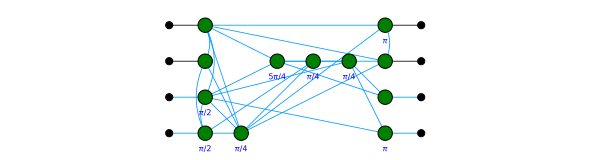

In [4]:
g2 = c2.to_graph()
zx.simplify.clifford_simp(g2)
g2.normalise()
zx.draw(g2)